In [1]:
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import string
from textblob import TextBlob

<b>Exploratory Data Analytics<b>

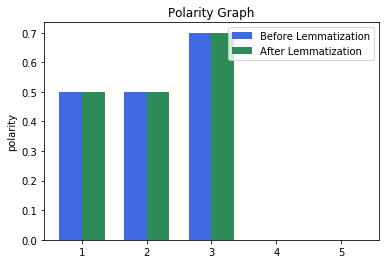

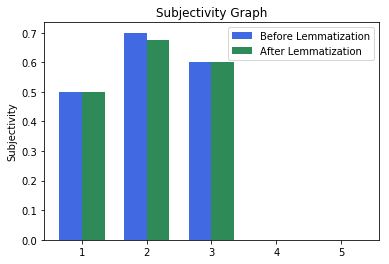

Conclusion: Even After lemmatization the polarity and subjectivity scores are the same so it is better to use the normalise data Lemmatized one
Final Pair Wise Input Data after lemmatization


In [2]:
def getInputData(inputFile):
    with open(inputFile,"r") as filePointer:
        inputData = filePointer.readlines()
    return inputData

def getStopWords(language):
    return set(stopwords.words(language))

def getPairWiseSegments(inputData):
    index = -1
    pairWiseTextSegments = []
    sentenceTokenisedList = []
    for i in range(len(inputData)):
        if i % 2 == 0:
            index += 1
            pairWiseTextSegments.append([])
            sentenceTokenisedList.append([])
            pairWiseTextSegments[index].append(inputData[i].rstrip())
            sentenceTokenisedList[index].append(inputData[i].rstrip())
        else:
            pairWiseTextSegments[index].append(inputData[i].rstrip())
            sentenceTokenisedList[index].append(inputData[i].rstrip())
    return pairWiseTextSegments, sentenceTokenisedList

def getWordTokenised(sentenceTokenisedList):
    wordTokenisedList = []
    for i in range(len(sentenceTokenisedList)):
        wordTokenisedList.append([])
        wordTokenisedList[i].append(word_tokenize(sentenceTokenisedList[i][0]))
        wordTokenisedList[i].append(word_tokenize(sentenceTokenisedList[i][1]))
    return wordTokenisedList

def getPairWiseCorpus(pairWiseTextSegments):
    pairWiseCorpus = []
    for i in pairWiseTextSegments:
        pairWiseCorpus.append(''.join(i))
    return pairWiseCorpus

def getPunctuationFreeList(inputString):
    tokenizer = RegexpTokenizer(r'\w+')          
    punctuationFreeList = tokenizer.tokenize(inputString)
    return punctuationFreeList

def getPunctuationFreeCorpus(pairWiseCorpus):
    punctuationFreeCorpus = []
    for i in pairWiseCorpus:
        punctuationFreeCorpus.append(getPunctuationFreeList(i))
    return punctuationFreeCorpus

def getStopWordFreeList(stopWordsList,puncutationFreeList):
    stopWordFreeList = []
    for i in puncutationFreeList:
        if i.lower() not in stopWordsList and len(i.lower()) != 1:
            stopWordFreeList.append(i)
    return stopWordFreeList

def getStopWordFreeCorpus(punctuationFreeCorpus):
    stopWordList = getStopWords('english')
    stopWordFreeCorpus = []
    for i in punctuationFreeCorpus:
        stopWordFreeCorpus.append(getStopWordFreeList(stopWordList, i))
    return stopWordFreeCorpus

def getLemmatizedCorpus(stopWordFreeCorpus):
    lemmatizedCorpus = []
    lemmatizer = WordNetLemmatizer()
    for i in range(len(stopWordFreeCorpus)):
        lemmatizedCorpus.append([])
        for j in  stopWordFreeCorpus[i]:
            lemmatizedCorpus[i].append(lemmatizer.lemmatize(j))
    return lemmatizedCorpus

def getWordDifferenceIndex(stopWordFreeCorpus, lemmatizedCorpus):
    wordDifferenceIndex = {}
    for i in range(len(stopWordFreeCorpus)):
        for j in range(len(stopWordFreeCorpus[i])):
            if stopWordFreeCorpus[i][j] != lemmatizedCorpus[i][j]:
                if i not in wordDifferenceIndex:
                    wordDifferenceIndex[i] = []
                    wordDifferenceIndex[i].append([stopWordFreeCorpus[i][j],lemmatizedCorpus[i][j]])
                else:
                    wordDifferenceIndex[i].append([stopWordFreeCorpus[i][j],lemmatizedCorpus[i][j]])
    return wordDifferenceIndex

def getWordIndexOfPairWiseData(wordTokenisedList):
    stopWordsList = getStopWords('english')
    counter = 0
    wordIndexOfPairWiseData = {}
    for i in range(len(wordTokenisedList)):
        wordIndexOfPairWiseData[i] = {0:{},1:{}}
        for j in range(len(wordTokenisedList[i])):
            for k in range(len(wordTokenisedList[i][j])):
                if (wordTokenisedList[i][j][k] not in wordIndexOfPairWiseData[i][j]) \
                    and (wordTokenisedList[i][j][k].lower() not in stopWordsList) \
                    and len(wordTokenisedList[i][j][k]) != 1:
                    wordIndexOfPairWiseData[i][j].update(
                        {wordTokenisedList[i][j][k] : k})
    return wordIndexOfPairWiseData

def plotBarGraph(list1, list2, ylabel, graphTitle):
    N = len(list1)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars
    fig = plt.figure()
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, list1, width, color='royalblue')
    rects2 = ax.bar(ind+width, list2, width, color='seagreen')
    ax.set_ylabel(ylabel)
    ax.set_title(graphTitle)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels( ('1', '2', '3', '4', '5') )
    ax.legend( (rects1[0], rects2[0]), ('Before Lemmatization', 'After Lemmatization') )
    plt.show()
def getGraph(beforePreProcessing, afterPreProcessing):
    beforePreProcessingPloarity = []
    afterPreProcessingPloarity = []
    beforePreProcessingSubjectivity = []
    afterPreProcessingSubjectivity = []
    for i in range(len(beforePreProcessing)):
        beforePreProcessingPloarity.append(beforePreProcessing[i][0])
        afterPreProcessingPloarity.append(afterPreProcessing[i][0])
        beforePreProcessingSubjectivity.append(beforePreProcessing[i][1])
        afterPreProcessingSubjectivity.append(afterPreProcessing[i][1])
    plotBarGraph(beforePreProcessingPloarity, afterPreProcessingPloarity,'polarity', 
                 'Polarity Graph')
    plotBarGraph(beforePreProcessingSubjectivity, afterPreProcessingSubjectivity,'Subjectivity', 
                 'Subjectivity Graph')
    
def lemmatizingEffect(wordDifferenceIndex, wordTokenisedList, wordIndexOfPairWiseData):
    beforePreProcessing = []
    afterPreProcessing = []
    for key,values in wordDifferenceIndex.items():
        inputSentence1 = ' '.join(wordTokenisedList[key][0])
        inputSentence2 = ' '.join(wordTokenisedList[key][1])
        sentence1 = -1
        sentence2 = -1
        for i in range(len(values)):
                if values[i][0] in wordIndexOfPairWiseData[key][0]:
                    sentence1 = 1
                    wordTokenisedList[key][0][wordIndexOfPairWiseData[key][0][values[i][0]]] = values[i][1]
                elif values[i][0] in wordIndexOfPairWiseData[key][1]:
                    sentence2 = 1
                    wordTokenisedList[key][1][wordIndexOfPairWiseData[key][1][values[i][0]]] = values[i][1]
        if sentence1 == 1:
            beforePreProcessing.append(TextBlob(inputSentence1).sentiment)
            afterPreProcessing.append(TextBlob(' '.join(wordTokenisedList[key][0])).sentiment)
        if sentence2 == 1:
            beforePreProcessing.append(TextBlob(inputSentence2).sentiment)
            afterPreProcessing.append(TextBlob(' '.join(wordTokenisedList[key][1])).sentiment)       
    getGraph(beforePreProcessing, afterPreProcessing)
            

def getSemanticRelation(inputFile):
    inputData = getInputData(inputFile)
    pairWiseTextSegments, sentenceTokenisedList = getPairWiseSegments(inputData)
    wordTokenisedList = getWordTokenised(sentenceTokenisedList)
    pairWiseCorpus = getPairWiseCorpus(pairWiseTextSegments)
    wordIndexOfPairWiseData = getWordIndexOfPairWiseData(wordTokenisedList)
    punctuationFreeCorpus = getPunctuationFreeCorpus(pairWiseCorpus)
    stopWordFreeCorpus = getStopWordFreeCorpus(punctuationFreeCorpus)
    lemmatizedCorpus = getLemmatizedCorpus(stopWordFreeCorpus)
    wordDifferenceIndex = getWordDifferenceIndex(stopWordFreeCorpus, lemmatizedCorpus)
    lemmatizingEffect(wordDifferenceIndex, wordTokenisedList, wordIndexOfPairWiseData)
    print("Conclusion: Even After lemmatization the polarity and subjectivity scores are the same so it is better to use the normalise data Lemmatized one")
    print("Final Pair Wise Input Data after lemmatization")
    

if __name__ == "__main__":
    inputFile = "Dataset.txt"
    getSemanticRelation("Dataset.txt")

In [3]:
lemmatized_data = [['like', 'fish', 'fry', 'lunch', 'whenever', 'side', 'sea', 'professor',
                    'ferocious', 'make', 'noise', 'classroom', 'fry', 'front', 'everybody'], 
                   ['visiting', 'bank', 'deposit', 'cash', 'earned', 'day', 'earn', 'interest', 
                    'overtime', 'flood', 'better', 'go', 'river', 'bank', 'though', 'depositing', 
                    'stone', 'harden'], ['Pure', 'malt', 'whiskey', 'bit', 'soda', 'make', 'afraid', 
                    'make', 'brave', 'asked', 'develop', 'machine', 'learning', 'algorithm', 'afraid', 
                    'ended', 'looking', 'job'], ['horse', 'faithful', 'powerful', 'car', 'love', 'care', 
                    'talk', 'make', 'feel', 'good', 'upset', 'old', 'car', 'best', 'faithful', 'smooth', 
                    'powerful', 'never', 'stalled', 'highway'], ['pen', 'writes', 'like', 'dream', 'carry', 
                    'examination', 'examiner', 'need', 'good', 'hand', 'writing', 'answer', 'script', 'dream', 
                    'holiday', 'island', 'sea', 'gull', 'flying', 'sea', 'breeze', 'blowing'], ['driving', 
                    'license', 'identity', 'USA', 'everything', 'linked', 'strongest', 'leader', 'seen', 
                    'island', 'nation', 'gave', 'u', 'identity', 'world']]
for i in range(len(lemmatized_data)):
    lemmatized_data[i] = list(set(lemmatized_data[i]))

In [4]:
def convertToSynset(lemmatized_data):    
    sentences = []
    for words in lemmatized_data:
        words_in_synset_form = []
        for word in words:
            if len(wn.synsets(word)) > 0:
                words_in_synset_form.append(wn.synsets(word)[0])
            else:
                words_in_synset_form.append(word)
        sentences.append(words_in_synset_form)
    return sentences

In [5]:
brown_ic = wordnet_ic.ic('ic-brown.dat')

In [6]:
def resnikSimilarity(lemmatized_data):
    sentences = convertToSynset(lemmatized_data)
    similarity_frame = []
    i = 0
    for words in sentences:
        similarities = []
        for word1 in words:
            w = []
            for word2 in words:
                try:
                    w.append(round(word1.res_similarity(word2, brown_ic), 2))
                except:
                    w.append(0)
            similarities.append(w)
        similarity_frame.append(pd.DataFrame(similarities,
                                    index=lemmatized_data[i], 
                                    columns=lemmatized_data[i]))
        i += 1
    return similarity_frame

In [7]:
def jiangConrathSimilarity(lemmatized_data):
    sentences = convertToSynset(lemmatized_data)
    similarity_frame = []
    i = 0
    for words in sentences:
        similarities = []
        for word1 in words:
            w = []
            for word2 in words:
                try:
                    w.append(round(word1.jcn_similarity(word2, brown_ic), 2))
                except:
                    w.append(0)
            similarities.append(w)
        similarity_frame.append(pd.DataFrame(similarities,
                                    index=lemmatized_data[i], 
                                    columns=lemmatized_data[i]))
        i += 1
    return similarity_frame

In [8]:
def linSimilarity(lemmatized_data):
    sentences = convertToSynset(lemmatized_data)
    similarity_frame = []
    i = 0
    for words in sentences:
        similarities = []
        for word1 in words:
            w = []
            for word2 in words:
                try:
                    w.append(round(word1.lin_similarity(word2, brown_ic), 2))
                except:
                    w.append(0)
            similarities.append(w)
        similarity_frame.append(pd.DataFrame(similarities,
                                    index=lemmatized_data[i], 
                                    columns=lemmatized_data[i]))
        i += 1
    return similarity_frame

with open('Dataset.txt', mode = 'r') as file:
    data = file.readlines()

table = str.maketrans({key: None for key in string.punctuation})
for i in range(len(data)):
    data[i] = data[i].translate(table)
    data[i] = data[i][:-1]

In [9]:
with open('Dataset.txt', mode = 'r') as file:
    data = file.readlines()

In [10]:
for i in range(len(data)):
    data[i] = data[i][:-1]

In [11]:
def semanticVector(lemmatized_data, data, similarity_frame):    
    semantic_vector = []
    threshold = 0.05
    for i in range(0, len(lemmatized_data)):
        j = 0
        vector1 = np.zeros(len(lemmatized_data[i]))
        vector2 = np.zeros(len(lemmatized_data[i]))
        segment1 = getLemmatizedCorpus(getStopWordFreeCorpus([data[2*i].split(' ')]))[0]
        segment2 = getLemmatizedCorpus(getStopWordFreeCorpus([data[2*i+1].split(' ')]))[0]
        for word in lemmatized_data[i]:
            if word in segment1:
                vector1[j] = 1
            else:
                score = []
                for seg_word in segment1:
                    try:
                        score.append(similarity_frame[i][word].loc[seg_word])
                    except:
                        score.append(0)
                if max(score) > threshold:
                    vector1[j] = max(score)
            if word in segment2:
                vector2[j] = 1
            else:
                score = []
                for seg_word in segment2:
                    try:
                        score.append(similarity_frame[i][word].loc[seg_word])
                    except:
                        score.append(0)
                if max(score) > threshold:
                    vector2[j] = max(score)
            j += 1
        semantic_vector.append((vector1, vector2))
    return semantic_vector

In [12]:
def cosineSimilarity(semantic_vector1, semantic_vector2):
    #semantic_vector1 = np.asarray(semantic_vector1)
    #semantic_vector2 = np.asarray(semantic_vector2)
    dot_product = np.dot(semantic_vector1, semantic_vector2)
    cosine_similarity = dot_product / (np.sqrt(np.dot(semantic_vector1, semantic_vector1)) * np.sqrt(
    np.dot(semantic_vector2, semantic_vector2)))
    return cosine_similarity

In [13]:
def semanticRelatedness(semantic_vector):
    columns = ['Text Segment 1', 'Text Segment 2', 'Semantic Relatedness']
    index = 0
    semantic_relatedness = []
    for pair_vector in semantic_vector:
        cosine_similarity = cosineSimilarity(pair_vector[0], pair_vector[1])
        semantic_relatedness.append([data[2 * index], data[2 * index + 1], cosine_similarity])
        index += 1
    return pd.DataFrame(semantic_relatedness, index = range(1, 7), columns = columns)

In [14]:
def calculateAndDisplay(lemmatized_data, data):
    similarity_frame = jiangConrathSimilarity(lemmatized_data)
    semantic_vector = semanticVector(lemmatized_data, data, similarity_frame)
    return semanticRelatedness(semantic_vector)

In [15]:
semantic_relatedness_table = calculateAndDisplay(lemmatized_data, data)

In [16]:
semantic_relatedness_table

Text Segment 1  \
1  I like fish fry with lunch whenever I am by th...   
2  He is visiting bank to deposit all his cash ea...   
3  Pure malt whiskey with a bit of soda can make ...   
4  It is a horse that is more faithful and powerf...   
5  I have a pen that writes like a dream. I carry...   
6  My driving license is my identity in USA as ev...   

                                      Text Segment 2  Semantic Relatedness  
1  Our professor is ferocious i.e. if you make no...              0.325425  
2  During flood, better not go to the river bank ...              0.247520  
3  They asked me to develop a machine learning al...              0.198350  
4  My old car is the best i.e. faithful, smooth, ...              0.250769  
5  I had a dream that I was having a holiday in t...              0.133832  
6  He is the strongest leader we have seen in thi...              0.251843